In [1]:
# Import models and utility functions that would be required
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import roc_auc_score, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import average_precision_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import norm
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# ignore warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [82]:
#Reading the file
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

## Description of the dataset


step - unit of time.

type - different type of transactions

amount - amount of the transaction.

nameOrig - information of customer who started the transaction

oldbalanceOrg - old balance before transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance of the receiver  before the transaction.
##### Problem: No information of oldbalanceDest for nameDest staring with M. Also calculation mistake after transaction
newbalanceDest - new balance of the receiver after the transaction.
#####  Problem: No information of newbalanceDest for nameDest staring with M. Also calculation mistake after transaction

isFraud - This is the transactions made by the fraudulent agents.

isFlaggedFraud - Transactions which are fllaged as fraud because of heavy amount

In [54]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [83]:
#Removing the unwanted columns
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [16]:
#Check if isFlaggedFraud is an important feature
df['isFlaggedFraud'].value_counts()

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

In [12]:
#From above we could see isFlaggedFraud has 2 distinct values so it might be important in future and hence we will keep it.

In [56]:
#Checking for data types in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
step              int64
type              object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(1)
memory usage: 436.9+ MB


In [15]:
#describing the data
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


### Correlation Plot
    Let us plot a correlation plot to check the correlation between the variables in the data set.

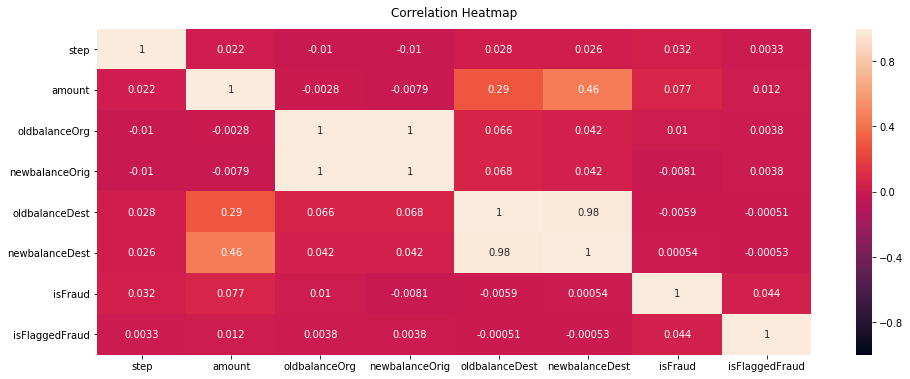

In [4]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### As we can see from above that there is no alarming corrrelation between the feautures, the one which has are expected

In [18]:
### Before submitting describe the dataset from https://github.com/sharmaroshan/Fraud-Detection-in-Online-Transactions/blob/master/Fraud_detection_in_financial_payment_services.ipynb

### Visualizations

In [21]:
#Defining a simple bar plot function
def simple_bar_plot(data, title = None):
    data.plot("bar", title = title)

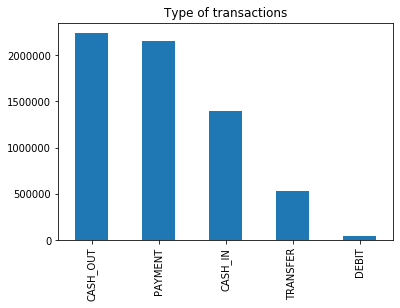

In [22]:
#plotting the distribution of transaction methods
simple_bar_plot(df["type"].value_counts(sort=True)[:10], title = "Type of transactions")

### We see most of the transactions are through cashout

In [24]:
#Defining the function count plot
def count_plot(dataframe, column_name, title =None, hue = None):
    base_color = sns.color_palette()[0]
    sns.countplot(data = dataframe, x = column_name, hue=hue)
    plt.title(title)

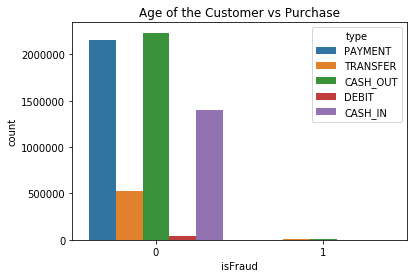

In [26]:
count_plot(df,"isFraud","Age of the Customer vs Purchase","type")

### We see from above visualization that fraud happens only in cash_out and transfer transactional types

### Creating a distribution plot for step

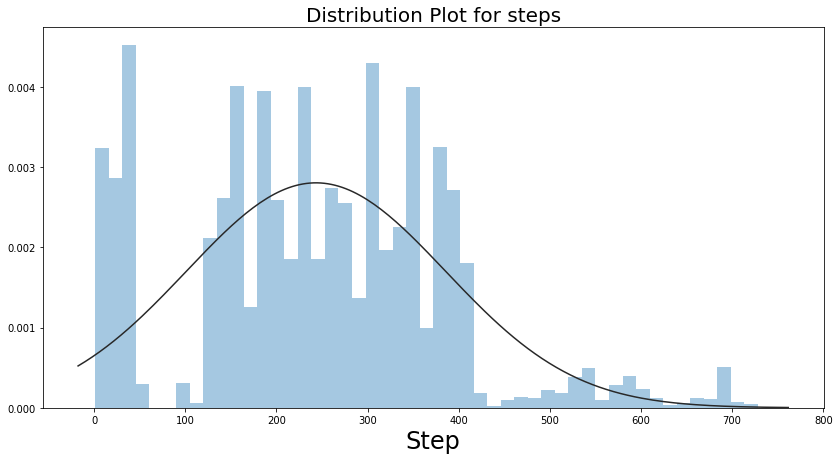

In [28]:
plt.rcParams['figure.figsize'] =(14, 7)


sns.distplot(df.step, fit = norm, kde = False)
plt.title('Distribution Plot for steps', fontsize = 20)
plt.xlabel('Step', fontsize = 24)
plt.show()

### Creating the density plot of amounts transacted

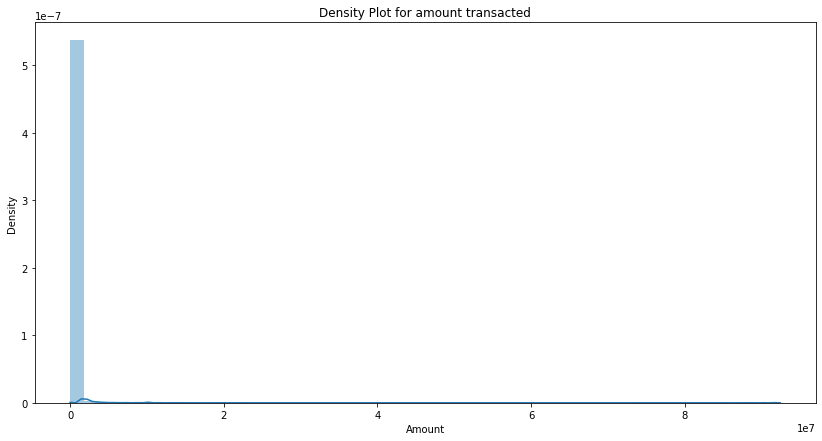

In [37]:

sns.distplot(df['amount']) 
plt.xlabel('Amount') #the name of the x axis of the graph
plt.ylabel('Density')     #the name of the y axis of the graph
plt.title('Density Plot for amount transacted') # the name of the title of the graph
plt.show()

### From above visualization we see most transactions are between 0 - 2000

### Pie chart for checking for percentage of fraud

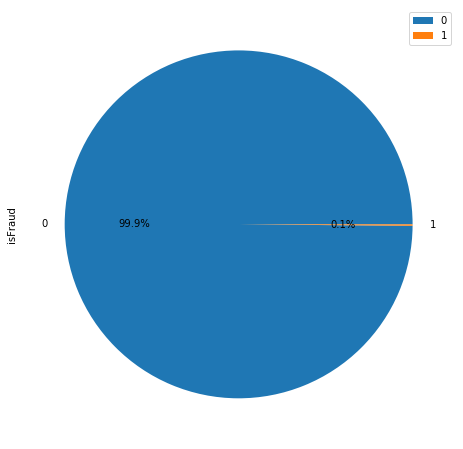

In [75]:

f,ax=plt.subplots(figsize=(20,8))
df['isFraud'].value_counts().plot.pie(autopct='%1.1f%%',labels=df['isFraud'].unique())
plt.legend()
plt.show()

### From above we see only 1% of the total transactions are fraud

### Distribution of amounts transacted

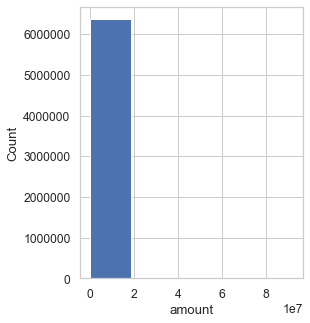

In [84]:
import seaborn as sns

sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [4, 5]})
sns.distplot(
    df['amount'], norm_hist=False, kde=False, bins=5, hist_kws={"alpha": 1}
).set(xlabel='amount', ylabel='Count');

In [80]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Origin_Error,Destination_Error
0,1,4,9839.64,170136.0,160296.36,0.0,0.0,0,0,0.0,9839.64
1,1,4,1864.28,21249.0,19384.72,0.0,0.0,0,0,0.0,1864.28
2,1,0,181.00,181.0,0.00,0.0,0.0,1,0,0.0,181.00
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0,0.0,21363.00
4,1,4,11668.14,41554.0,29885.86,0.0,0.0,0,0,0.0,11668.14


### Scatter for amounts transacted wrt various types of transaction

([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

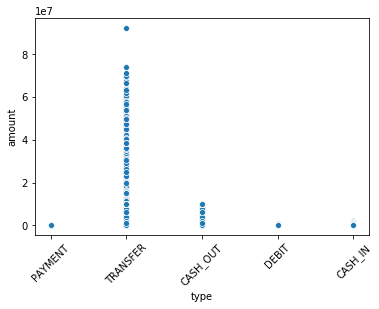

In [84]:
sns.scatterplot(x=df['type'], y=df['amount']);
plt.xticks(rotation=45)

### From above we could see the big amounts are transacted through transfer medium and also there is outlier which means will scale the data before applying in models

### Feature Engineering

In [4]:
#Creating a Errors columns to check for error in balance calaculation in both Origin and Destination
df['Origin_Error']=df['newbalanceOrig']+df['amount']-df['oldbalanceOrg']
df['Destination_Error']=df['oldbalanceDest']-df['newbalanceDest'] + df['amount']

In [7]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud',
       'Origin_Error', 'Destination_Error'],
      dtype='object')

### Checking if the newly created error columns are somehow related to 'isFraud' column

In [102]:
correlation = df['isFraud']. corr(df['Origin_Error'])
print(correlation)

0.011283456786105317


In [132]:
correlation = df['isFraud']. corr(df['Destination_Error'])
print(correlation)

0.055119588713993924


### We saw there is no significant correlation

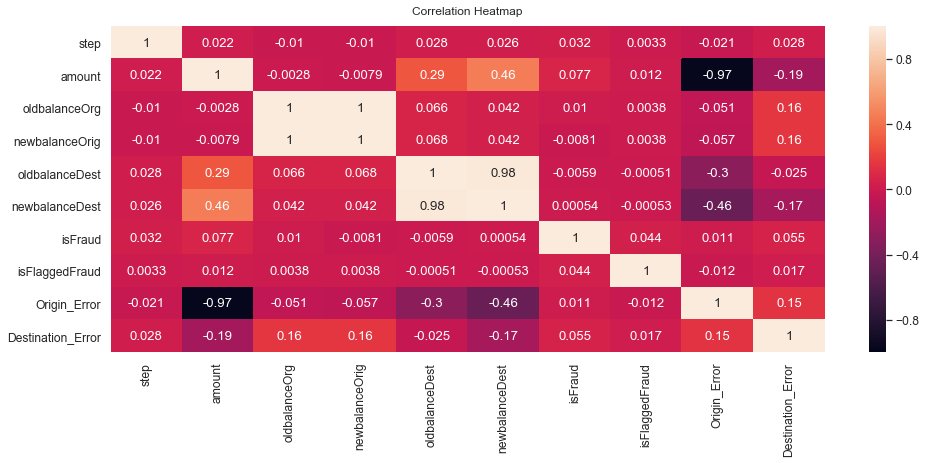

In [133]:
#Creating a heat map with new columns for the whole table
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

### Data Cleaning

In [107]:
#Checking for null values
df.isnull().any().any()

False

### Finding out number of  fraud transfers

In [6]:

# Since from above visualizations we saw fraud happens only in transfer and cash
Fraud_transaction_transfer = df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')]
Fraud_transaction_cash  = df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')]


#number of fraudulent transfers and cash outs
print ('fraud TRANSFERS = {}'.format(len(Fraud_transaction_transfer)))
print ('fraud CASH_OUTs = {}'.format(len(Fraud_transaction_cash)))

fraud TRANSFERS = 4097
fraud CASH_OUTs = 4116


### Finding maximum fraud amount in one trasaction in both types

In [7]:
print("maximum fraund amount in transfer- ", df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')].amount.max())
print("maximum fraund amount in cash out- ", df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')].amount.max())

maximum fraund amount in transfer-  10000000.0
maximum fraund amount in cash out-  10000000.0


### Checking when Flagged and Fraud both are same

In [8]:
Flagged_and_fraud = df.loc[(df.isFraud == 1) & (df.isFlaggedFraud == 1)]

In [9]:
Flagged_and_fraud['isFlaggedFraud'].count()

16

### Checking when Flagged and Fraud are different

In [12]:
Flagged_and_not_fraud = df.loc[(df.isFraud == 1) & (df.isFlaggedFraud == 0)]

In [13]:
Flagged_and_not_fraud['isFlaggedFraud'].count()

8197

In [140]:
df.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Destination_Error,Origin_Error
0,1,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0,0,9839.64,0.00
1,1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0,0,1864.28,0.00
2,1,TRANSFER,181.00,181.00,0.00,0.0,0.00,1,0,181.00,0.00
3,1,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1,0,21363.00,0.00
4,1,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0,0,11668.14,0.00
5,1,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0,0,7817.71,0.00
6,1,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0,0,7107.77,0.00
7,1,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0,0,7861.64,0.00
8,1,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0,0,4024.36,1353.36
9,1,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0,0,6886.98,0.00


In [136]:
#df=df.drop('Origin_Error', axis= 1)

### Data Pre processing

In [10]:
# Label encoding for 'type'
df['type'].replace('TRANSFER', 0, inplace = True)
df['type'].replace('CASH_OUT', 1, inplace = True)
df['type'].replace('CASH_IN', 2, inplace = True)
df['type'].replace('DEBIT', 3, inplace = True)
df['type'].replace('PAYMENT', 4, inplace = True)

In [47]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Origin_Error,Destination_Error
0,1,4,9839.64,170136.0,160296.36,0.0,0.0,0,0,0.0,9839.64
1,1,4,1864.28,21249.0,19384.72,0.0,0.0,0,0,0.0,1864.28
2,1,0,181.00,181.0,0.00,0.0,0.0,1,0,0.0,181.00
3,1,1,181.00,181.0,0.00,21182.0,0.0,1,0,0.0,21363.00
4,1,4,11668.14,41554.0,29885.86,0.0,0.0,0,0,0.0,11668.14


### Making dataset with only CASH_OUT and TRANSFER medium of transaction since frauds happens with only these two mediums of transfer

In [48]:
df_new = df.loc[(df.type == 0) | (df.type == 1)]

In [49]:
df_new.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,Origin_Error,Destination_Error
2,1,0,181.00,181.0,0.0,0.0,0.00,1,0,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,1,0,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0,0,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0,0,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0,0,300850.89,-2401220.0


In [50]:
# Defining X and Y for applying in models


Y = df_new['isFraud']

# removing the dependent set
X = df_new.drop(['isFraud'], axis = 1)

In [51]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,Origin_Error,Destination_Error
2,1,0,181.00,181.0,0.0,0.0,0.00,0,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,0,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0,300850.89,-2401220.0


Using SMOTE(Synthetic Minority Oversampling Technique) for balancing the dataset

In [18]:
#installing imblearnx
pip install --user imblearn

  Using cached https://files.pythonhosted.org/packages/81/a7/4179e6ebfd654bd0eac0b9c06125b8b4c96a9d0a8ff9e9507eb2a26d2d7e/imblearn-0.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/c8/81/8db4d87b03b998fda7c6f835d807c9ae4e3b141f978597b8d7f31600be15/imbalanced_learn-0.7.0-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.


In [52]:
X_res, Y_res = SMOTE().fit_sample(X, Y.values.ravel())

### Random Forest Classifier
I decided to Random Forest Model because it is a meta estimator that fits a number of decision tree classifiers on
various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [53]:
# Splitting the data into into test and train 

X_train, X_test, Y_Train, Y_Test  = train_test_split(X_res, Y_res, test_size=0.3, random_state= 0)

#Defining the model
rfc = RandomForestClassifier(n_estimators=100,max_depth=6,random_state=42,
                                verbose=1,class_weight="balanced")



In [54]:

#Scaling our train and test data in independent variables

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
#Fitting the model
rfc.fit(X_train,Y_Train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 23.1min finished


RandomForestClassifier(class_weight='balanced', max_depth=6, random_state=42,
                       verbose=1)

In [59]:
#Prediction of X test data
Y_Pred = rfc.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   29.7s finished


In [60]:
# score of the model which will tell how efficiently the values are predicted
auprc = average_precision_score(Y_Test, Y_Pred)
print("The Area under Precision Recall Curve Score is", auprc)

The Area under Precision Recall Curve Score is 0.9979078462703602


### Confusion matrix to check efficiency of the model

In [65]:
print("Confusion Matrix of Random Forest Classifier: \n", confusion_matrix(Y_Test,Y_Pred))

Confusion Matrix of Random Forest Classifier: 
 [[828937      5]
 [  3455 824921]]


### The obtained matrix shows the following:

    828937 true negative predictions: Ones predicted correctly as non fraud.
    3455 false negative predictions:  These are the ones wrongly predicted.
    5 false positive prediction: These are ones predicted incorrectly as fraud
    824921 true positive predictions: These are ones predicted correctly as fraud.

In [66]:
roc_auc_score(Y_Test,rfc.predict_proba(X_test)[:,1])

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   29.7s finished


0.9994737870329474

In [67]:
#Finding precision score
precision_score(Y_Test ,Y_Pred)

0.9999939388502727

In [69]:
#Finding recall score
recall_score(Y_Test ,Y_Pred)

0.9958291886776054

### F1 score    
    We use a measure that combines precision and recall into a single variable
    called the F1 score, which is a harmonic mean. A harmonic mean gives
    more weight to lower values, as a result a classifier can only get a high
    score if both values are high.

In [85]:
from sklearn.metrics import f1_score 
f1_score(Y_Test ,Y_Pred)

0.9979072184029294

### Checking for the best features from Random forest to use ahead in logistic regression

In [71]:
print(rfc.feature_importances_)

[3.21887188e-02 1.12803515e-02 4.65843736e-02 2.09800533e-01
 9.42896299e-02 3.51264894e-02 9.56422491e-02 2.58949686e-04
 4.11474509e-01 6.33541965e-02]


### We could see that almost all the features are important from the scores obtained

### Logistic Regression
    I am using logistic for second model because it belongs to the group of linear classifiers while Random forest  is             multiclass classifier.Logistic regression is fast and relatively uncomplicated. It’s essentially a method for binary           classification but could be used  for multiclass problems as well. It is mix polynomial and linear regression.
    It uses a sigmoid function to convert the outcome into categorical values from logit function

In [72]:
#Making the model
logreg = LogisticRegression()
logreg.fit(X_train, Y_Train)

LogisticRegression()

In [73]:
#Predicting the test set results and calculating the accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_Test)))

Accuracy of logistic regression classifier on test set: 0.95


In [77]:
#Confusion Matrix
confusion_matrix = confusion_matrix(Y_Test, y_pred)
print(confusion_matrix)

[[785700  43242]
 [ 43568 784808]]


In [86]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(Y_Test, y_pred))
print('MSE:', metrics.mean_squared_error(Y_Test, y_pred))

MAE: 0.05237980882365364
MSE: 0.05237980882365364


In [ ]:
#We could see the MSE and MAE are very less hence the above is a good model

### For improving results
    1. Using cross validation reak up the training data into different subsets, called K-folds so that the model is trained         and tested K times
    2. Using other techniques like checking for variance for feature selection
    3. Reducing overfitting if any, using Regularization, cross validation etc
    4. Getting more fradulent data if possible
    5. Feature engineering.
   